In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bank_customer_survey.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
data.shape

(45211, 17)

In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [6]:
num_cols=data.select_dtypes(exclude=['object']).columns
print('Numerical columns:')
print(num_cols)
cat_cols=data.select_dtypes(include=['object']).columns
print('Categorical columns:')
print(cat_cols)

Numerical columns:
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')
Categorical columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [7]:
for col in cat_cols:
    print(col,':')
    print(data[col].value_counts())
    print(data[col].value_counts()/(data[col]).count()*100)
    print()

job :
blue            9732
management      9458
technician      7597
admin           5171
services        4154
retired         2264
self            1579
entrepreneur    1487
unemployed      1303
housemaid       1240
student          938
unknown          288
Name: job, dtype: int64
blue            21.525735
management      20.919688
technician      16.803433
admin           11.437482
services         9.188029
retired          5.007631
self             3.492513
entrepreneur     3.289023
unemployed       2.882042
housemaid        2.742695
student          2.074716
unknown          0.637013
Name: job, dtype: float64

marital :
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

education :
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
secondary    51.319369
tertiary     29.419831
primary      15.153392
unk

In [8]:
data1=data.copy()

In [9]:
data1['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [10]:
#as age is to be categorized on the basis of quartiles
def cat_age(age):
    if age>=18 and age<33:
        return 1
    elif age>=33 and age<39:
        return 2
    elif age>=39 and age<48:
        return 3
    else:
        return 4
data1['age']=data1['age'].apply(cat_age)
    

In [11]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,4,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,3,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,3,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,2,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
cat_cols=['job', 'marital', 'education', 'default', 'housing', 'loan','month','contact','poutcome']
data1=pd.get_dummies(data1,columns=cat_cols,drop_first=True)
data1.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,4,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
1,3,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,2,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
3,3,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,2,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [13]:
data1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'job_blue', 'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [14]:
data1 = data1.reindex(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue', 'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown','y'], axis=1)

In [15]:
data1.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,4,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,3,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,2,2,5,76,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,3,1506,5,92,1,-1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,2,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [16]:
data1['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [17]:
data1['pdays']=data1['pdays'].replace(-1,0)

In [18]:
data1.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,4,2143,5,261,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,3,29,5,151,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,2,2,5,76,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,3,1506,5,92,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,2,1,5,198,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [19]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [20]:
#as the data is biased towards 0, under sampling should be done
X=data1.drop('y',axis=1)
y=data1['y']

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [22]:
#under sampling
Xy_train=pd.concat([X_train,y_train],axis=1)

Xy_train0=Xy_train.loc[Xy_train['y']==0]
Xy_train1=Xy_train.loc[Xy_train['y']==1]

len0=len(Xy_train0)
len1=len(Xy_train1)

Xy_train0_us=Xy_train0.sample(len1)

Xy_train_us=pd.concat([Xy_train0_us,Xy_train1],axis=0)

y_train_us=Xy_train_us['y']
X_train_us=Xy_train_us.drop(['y'],axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train_us,y_train_us)
print(f'R^2 score for train: {lr.score(X_train_us, y_train_us)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.834819016747704
R^2 score for test: 0.8381745797699793


In [24]:
import statsmodels.api as sm
Xc=sm.add_constant(X)
logit_model=sm.Logit(y,Xc)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.238397
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45168
Method:                           MLE   Df Model:                           42
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                  0.3394
Time:                        22:28:38   Log-Likelihood:                -10778.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.3753      0.163    -14.546      0.000      -2.695      -2.055
age                    -0.0486      0.020     -2.438      0.015      -0.088      -0.010
balance              1.359e-05   5.14e-06      2.642      0.008    3.51e-06    2.37e-05
day                     0.0100      0.002      3.993      0.000       0.005       0.015
duration                0.0042   6.46e-05     64.981      0.000       0.004       0.004
campaign               -0.0906      0.010     -8.941      0.000      -0.110      -0.071
pdays               -9.726e-05      0.000     -0.318      0.751      -0.001       0.001
previous                0.0103      0.007      1.578      0.115      -0.002       0.023
job_blue               -0.3146      0.073     -4.330      0.000      -0.457      -0.172
job_entrepreneur       -0.3463      0.126     -2.759      0.006      -0.592      -0.100
job_housemaid          -0.4835      0.136     -3.552      0.000      -0.750      -0.217
job_management         -0.1592      0.073     -2.173      0.030      -0.303      -0.016
job_retired             0.3055      0.090      3.396      0.001       0.129       0.482
job_self               -0.2969      0.112     -2.650      0.008      -0.516      -0.077
job_services           -0.2283      0.084     -2.715      0.007      -0.393      -0.063
job_student             0.3438      0.108      3.179      0.001       0.132       0.556
job_technician         -0.1768      0.069     -2.564      0.010      -0.312      -0.042
job_unemployed         -0.1715      0.112     -1.538      0.124      -0.390       0.047
job_unknown            -0.2927      0.233     -1.256      0.209      -0.750       0.164
marital_married        -0.1924      0.059     -3.266      0.001      -0.308      -0.077
marital_single          0.0325      0.068      0.481      0.631      -0.100       0.165
education_secondary     0.1714      0.065      2.650      0.008       0.045       0.298
education_tertiary      0.3594      0.075      4.780      0.000       0.212       0.507
education_unknown       0.2536      0.104      2.440      0.015       0.050       0.457
default_yes            -0.0173      0.163     -0.107      0.915      -0.336       0.302
housing_yes            -0.6842      0.044    -15.625      0.000      -0.770      -0.598
loan_yes               -0.4261      0.060     -7.102      0.000      -0.544      -0.308
month_aug              -0.6850      0.079     -8.723      0.000      -0.839      -0.531
month_dec               0.6884      0.177      3.895      0.000       0.342       1.035
month_feb              -0.1455      0.089     -1.628      0.104      -0.321       0.030
month_jan              -1.2621      0.122    -10.374      0.000      -1.501      -1.024
month_jul              -0.8293      0.077    -10.712      0.000      -0.981      -0.678
month_jun               0.4588      0.094      4.897      0.000       0.275       0.642
month_mar               1.5903      0.120     13.268      0.000       1.3

In [32]:
from sklearn.feature_selection import RFE
nof_list=np.arange(1,41)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    lr = LogisticRegression()
    rfe = RFE(lr,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    lr.fit(X_train_rfe,y_train)
    score = lr.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 40
Score with 40 features: 0.900988


In [33]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(lr, 40)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['age', 'day', 'duration', 'campaign', 'previous', 'job_blue',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


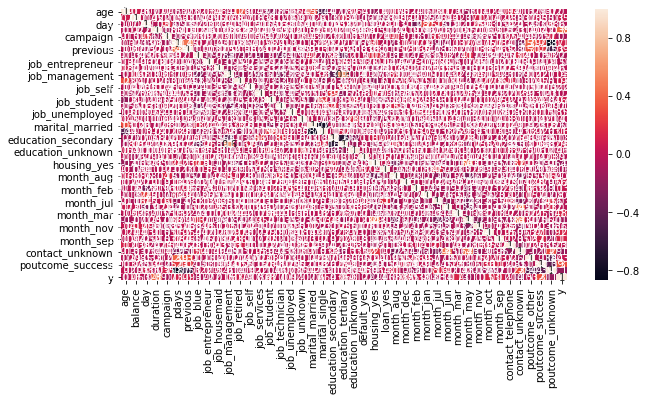

In [36]:
plt.figure(figsize=[10,5])
sns.heatmap(data1.corr(),annot=True)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [35]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
knn = KNeighborsClassifier()
param = {'n_neighbors':np.arange(1,10),'weights':['uniform','distance']}
GS_knn = GridSearchCV(knn,param,cv=5,scoring='roc_auc')
GS_knn.fit(X_rfe,y)

In [ ]:
GS_knn.best_params_

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
par_dt = {'criterion':['entropy','gini']}
GS_dt = GridSearchCV(dt,par_dt,cv = 3, scoring = 'roc_auc')
GS_dt.fit(X_rfe,y)

In [ ]:
GS_dt.best_params_

In [ ]:
rf=RandomForestClassifier(n_estimators=10)
param = {'n_neighbors':np.arange(1,10),'weights':['uniform','distance']}
GS_rf = GridSearchCV(knn,param,cv=3,scoring='roc_auc')
GS_rf.fit(X_rfe,y)

In [ ]:
GS_rf.best_params_

In [ ]:
lr=LogisticRegression()
nb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=9,weights='distance')
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
rf=RandomForestClassifier(n_estimators=10,random_state=0)
#bagging classifer
knn_bagging=BaggingClassifier(base_estimator=knn,n_estimators=10,random_state=0) #donot work with boosting
lr_bagging=BaggingClassifier(base_estimator=lr,n_estimators=10,random_state=0)
nb_bagging=BaggingClassifier(base_estimator=nb,n_estimators=10,random_state=0)
rf_bagging=BaggingClassifier(base_estimator=rf,n_estimators=10,random_state=0)
dt_bagging=BaggingClassifier(n_estimators=10,random_state=0) #by default
#boosting classifer
lr_boosting=AdaBoostClassifier(base_estimator=lr,n_estimators=50,random_state=0)
nb_boosting=AdaBoostClassifier(base_estimator=nb,n_estimators=50,random_state=0)
rf_boosting=AdaBoostClassifier(base_estimator=rf,n_estimators=50,random_state=0)
dt_boosting=AdaBoostClassifier(n_estimators=50,random_state=0)  #by default
#gradiant boosting
Gboost=GradientBoostingClassifier(n_estimators=100,random_state=0)

In [ ]:
models=[]
models.append(('logistic regression',lr))
models.append(('naive bayes',nb))
models.append(('knn',knn))
models.append(('decision tree',dt))
models.append(('random forest',rf))
#bagging
models.append(('knn bagging',knn_bagging))
models.append(('lr_bagging',lr_bagging))
models.append(('nb_bagging',nb_bagging))
models.append(('rf_bagging',rf_bagging))
models.append(('dt_bagging',dt_bagging))
#boosting
models.append(('lr_boosting',lr_boosting))
models.append(('nb_boosting',nb_boosting))
models.append(('rf_boosting',rf_boosting))
models.append(('dt_boosting',dt_boosting))
#gradient 
models.append(('Gradient boost',Gboost))

In [ ]:
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(shuffle = True,n_splits = 15, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X_rfe,y,cv= kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print(" %s: %f (%f)" %(name,np.mean(cv_results),np.var(cv_results,ddof = 1)))
    #boxplot algorithm comparsion:
fig = plt.figure()
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()